<a href="https://colab.research.google.com/github/sajjadraheem26/powerbi_work/blob/main/cnn(dog%20vs%20cat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#dogs vs cat classifier:

In [11]:
!pip install patool



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 2.1 MB/s eta 0:00:00


In [12]:
import patoolib

try:
    patoolib.extract_archive("cat_vs_dogs.zip", outdir="myfolder")
    print("Extraction successful!")
except Exception as e:
    print("Extraction failed:", e)



INFO patool: Extracting cat_vs_dogs.zip ...
INFO:patool:Extracting cat_vs_dogs.zip ...
INFO patool: ... creating output directory `myfolder'.
INFO:patool:... creating output directory `myfolder'.
INFO patool: running /usr/bin/7z x -aou -omyfolder -- cat_vs_dogs.zip
INFO:patool:running /usr/bin/7z x -aou -omyfolder -- cat_vs_dogs.zip


Extraction failed: Command `['/usr/bin/7z', 'x', '-aou', '-omyfolder', '--', 'cat_vs_dogs.zip']' returned non-zero exit status 2


In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [14]:
#generators::convert data into batches to work easily on large datasets::

In [17]:
#generators:(from keras doc.)
train_ds=keras.utils.image_dataset_from_directory(
                                            directory="/content/myfolder/dogs_vs_cats/train",
                                            labels="inferred",     #0,1
                                            label_mode="int",
                                            batch_size=32,
                                            image_size=(256, 256)     #although diff but will be converted to 256,256,3
)

Found 14040 files belonging to 2 classes.


In [18]:

test_ds=keras.utils.image_dataset_from_directory(
                                            directory="/content/myfolder/dogs_vs_cats/test",
                                            labels="inferred",     #0,1
                                            label_mode="int",
                                            batch_size=32,
                                            image_size=(256, 256) )

Found 5000 files belonging to 2 classes.


In [19]:
#normalise:
def process (image,label):
    image=tf.cast(image/255. , tf.float32)
    return image,label

train_ds_map=train_ds.map(process)
test_ds_map=test_ds.map(process)

In [28]:
#create cnn model::  (see copy)
model=Sequential()

#3 con2d layers:
model.add(Conv2D(32,kernel_size=(3,3), padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

#flatten:
model.add(Flatten())

#Fully conn layers:
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))   #output layer thuas 1,sigmoid.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [30]:
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [31]:
history=model.fit(train_ds, epochs=10, validation_data = test_ds)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 48s 94ms/step - accuracy: 0.6391 - loss: 3.2440 - val_accuracy: 0.5042 - val_loss: 0.7702
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 36s 81ms/step - accuracy: 0.7017 - loss: 0.5922 - val_accuracy: 0.5888 - val_loss: 0.6960
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.7211 - loss: 0.5582 - val_accuracy: 0.6408 - val_loss: 0.6224
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.7473 - loss: 0.5019 - val_accuracy: 0.5114 - val_loss: 0.8273
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 36s 81ms/step - accuracy: 0.7604 - loss: 0.4590 - val_accuracy: 0.5462 - val_loss: 0.7591
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.7890 - loss: 0.4123 - val_accuracy: 0.6062 - val_loss: 0.6617
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 36s 81ms/step - accuracy: 0.8083 - loss: 0.3920 - val_accuracy: 0.7616 - val_loss: 0.6113
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 36s 83ms/step - accuracy: 0.8478 - loss: 0.3319 - 

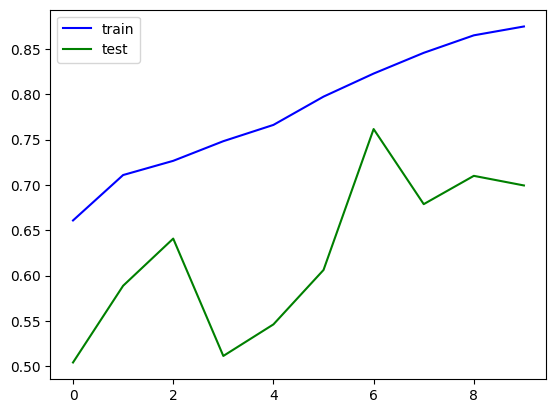

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='blue', label="train")
plt.plot(history.history['val_accuracy'],color='green', label="test")
plt.legend()
plt.show()

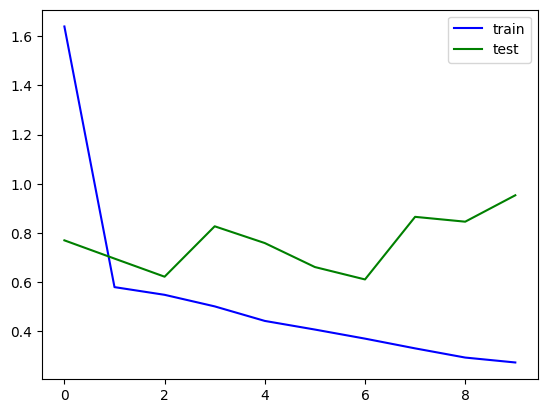

In [33]:
plt.plot(history.history['loss'],label="train",color='blue')
plt.plot(history.history['val_loss'],label="test",color='green')
plt.legend()

In [61]:
#test for new image
import cv2
test_dog=cv2.imread('/content/dog2.jpeg')
test_cat=cv2.imread('/content/cat.jpeg')

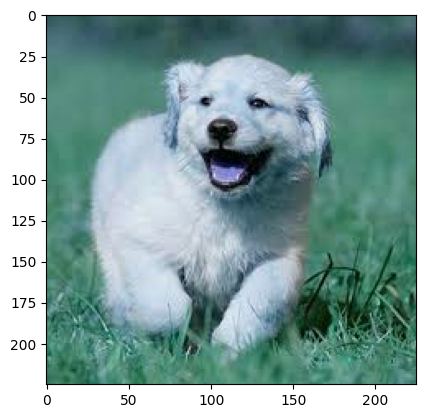

In [62]:
plt.imshow(test_dog)

In [63]:
test_dog.shape

(225, 225, 3)

In [64]:
test_dog=cv2.resize(test_dog,(256,256))

In [45]:
test_cat=cv2.resize(test_cat,(256,256))

In [65]:
test_dog.shape

(256, 256, 3)

In [67]:
#conver to tensor::
test_dog_tensor=test_dog.reshape(1,256,256,3)
#test_cat_tensor=test_cat.reshape(1,256,256,3)

In [69]:
model.predict(test_dog_tensor)      #high chnaces for dog,get test image close or above 256*256 in original size

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.99282783]], dtype=float32)

In [70]:
model.predict(test_cat_tensor)      #nearly confirm to cat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.06850047]], dtype=float32)